# Data Scientist Associate Practical Exam Submission
# GoalZone Booking Attendance Analysis
Use this template to complete your analysis and write up your summary for submission.


## Task 1 
The dataset contains 1500 rows and 8 columns with some missing values before cleaning. I have validated all the variables against the set criteria in task description:<br/>
	- booking_id: same as described<br/>
    - month_as_member: same as decribed and no missing values<br/>
    - weight: same as decribed and with 20 missing values and filled the missing values with the average of the column<br/>
    - days_before: no missing values and used tring replace method to convert to remove the days affix in some of the values<br/>
    - day_of_week: same as decribed and no missing values<br/>
    - time: same as decribed and no missing values<br/>
    - category: same as decribed and no missing values<br/>
    
 After cleaning and validation, the dataset contained the same number of records and fields

#### Loading the data

In [68]:
# import the reuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data validation - all variables are as decribed in the task list
df = pd.read_csv('fitness_class_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [69]:
# check the number of missing values
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [70]:
cat_columns = ['day_of_week', 'time', 'category']


#### Data validation

In [71]:
# validate the minimum values of the columns months_as_member, days_before, weight
print("Minimum values")
for col in ['months_as_member', 'days_before', 'weight']:
    print(f"{col}: {df[col].min()} ")

Minimum values
months_as_member: 1 
days_before: 1 
weight: 55.41 


##### Filling the missing values

In [72]:
# fill missing values with predefined values
def fill_missing(df):
    to_be_unknown, to_be_avg, to_be_0 = ['day_of_week', 'time', 'category'], ['months_as_member', 'weight'], ['days_before']
    for col in df.columns:
        if col in to_be_unknown:
            df[col].fillna('unknown', inplace=True)
        if col in to_be_avg:
            df[col].fillna(df[col].mean(), inplace=True)
        if col in to_be_0:
            df[col].fillna(0, inplace=True)
    df.dropna(inplace=True) # if not in either ie column attended, remove the row
    return df
df = fill_missing(df)

In [73]:
# check values if they fit description
for col in ['day_of_week', 'time', 'category']:
    print(f"{col} \n {df[col].unique()}")

day_of_week 
 ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time 
 ['PM' 'AM']
category 
 ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


In [74]:
df['days_before'].unique()


array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

##### Cleaning the  data

In [76]:
# clean values to fit description - day_of_week(wed, mon, fri), category(-, to unknown)
def clean_day_of_week(df):
    df['day_of_week'].mask(df['day_of_week'].str.startswith('Wed'), 'Wed', inplace=True)
    df['day_of_week'].mask(df['day_of_week'].str.startswith('Mon'), 'Mon', inplace=True)
    df['day_of_week'].mask(df['day_of_week'].str.startswith('Fri'), 'Fri', inplace=True)
    return df

def clean_category(df):
    df['category'].mask(df['category'] == '-', 'unknown', inplace=True)
    return df

# clean types - from object to pandas category for easier working with during visualisation and modelling
def clean_types(df):
    for col in cat_columns:
        df[col] = df[col].astype('category')
    df['days_before'] = df['days_before'].astype('int64')
    return df

# claen days_defore
def clean_days_defore(df):
    df['days_before'] = df['days_before'].str.replace(' days', '')
    return df

df = clean_day_of_week(df)
df = clean_category(df)
df = clean_days_defore(df)
df = clean_types(df)


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 63.8 KB


## Task 2 
### Number of bookings who attended the class
From fig 2, the category with most bookings attended was **HIIT with 46.92%** of total bookings attended.<br/>
The observations are not balanced across the categories as from fig 1 and fig 2 where HIIT and Cycling account for approximately 71.15% of bookings attended.<br/> Aqua and unknown have the least booking attended accounting for about 5.95% combined.<br/> This drift to the extremes makes the observations imbalanced.

why:<br/>
Bar chart -  The length of the bars is directly proportional to the values being represented, making it easy to compare them visually.<br/>
Pie chart - Ideal for showing the proportions of different categories or groups of data. The size of each slice of the pie is proportional to the value it represents and they are easy to understand.

In [78]:
attend_cat_df = df[['category', 'attended']].groupby('category')['attended'].sum().reset_index()
attend_cat_df.T

,0,1,2,3,4,5
category,Aqua,Cycling,HIIT,Strength,Yoga,unknown
attended,25,110,213,62,42,2


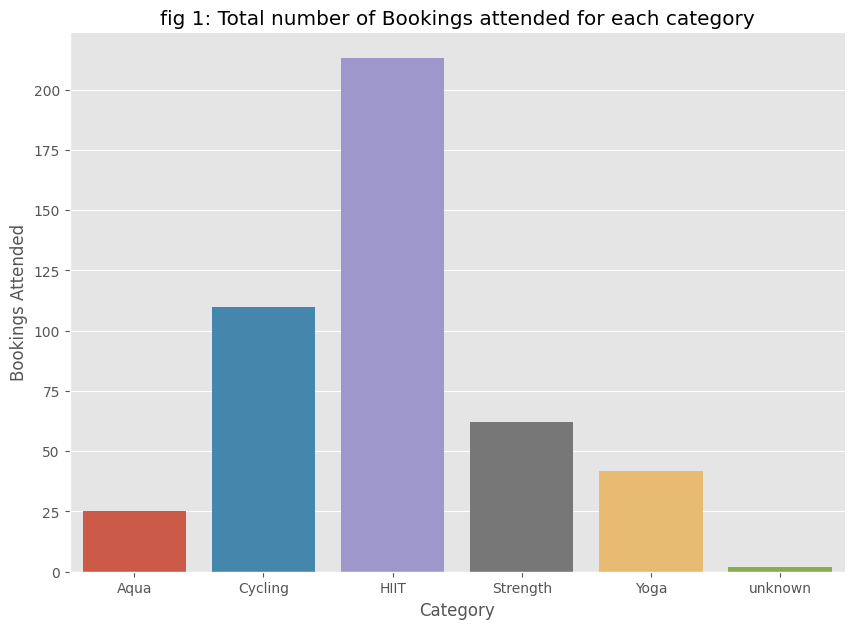

In [79]:
# set style for figs
plt.style.use('ggplot')

# plot the total attendees for each category, barplot
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(attend_cat_df, x='category', y='attended')
ax.set_title("fig 1: Total number of Bookings attended for each category")
ax.set_xlabel('Category')
ax.set_ylabel('Bookings Attended')
sns.despine()

Text(0.5, 1.0, 'fig 2: Percentage total of bookings attended for each category')

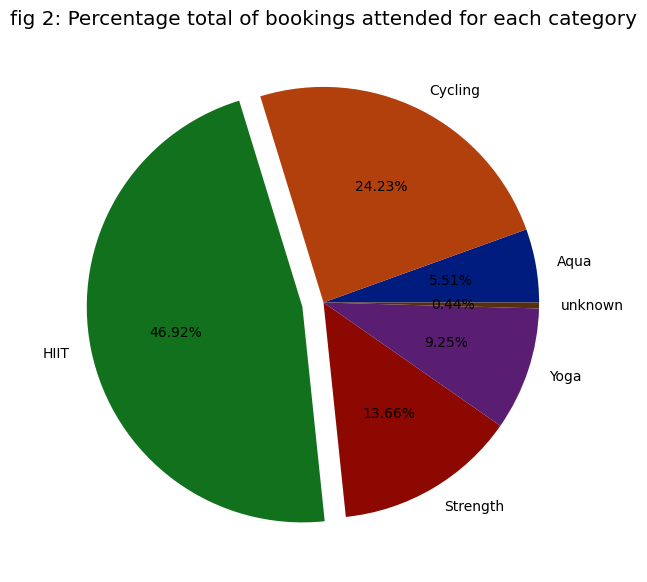

In [80]:
# plot a pie chart for better visualisation of totals
explode = [0 for i in range(len(df['category'].unique()))]
explode[2] = 0.1

palette_color = sns.color_palette('dark')
fig, ax = plt.subplots(figsize=(10, 7))
plt.pie(x=attend_cat_df['attended'], labels = attend_cat_df['category'], colors = palette_color, explode = explode, autopct = '%.2f%%')
ax.set_title("fig 2: Percentage total of bookings attended for each category")

## Task 3
### Distribution of the number of months as a member
From the graph, fig 3 Distribution of number of months as a member, we can see there is an outlier, an observation that lies beyong 140 months.<br/>
Given the few number of observations in the data, log transformation was carried out to get a better and closer look at the distribution, fig 4. <br/>
The distribution assumes a normal distribution but quite skewed to the right of the mean.

why:<br/>
Histogram - Useful for showing the shape of the data distribution. By displaying the frequency or relative frequency of the data in each bin, the histogram shows whether the data is skewed, bimodal, or normally distributed and identifies outliers.

Text(0.5, 1.0, 'fig 3: Distribution of number of months as a member')

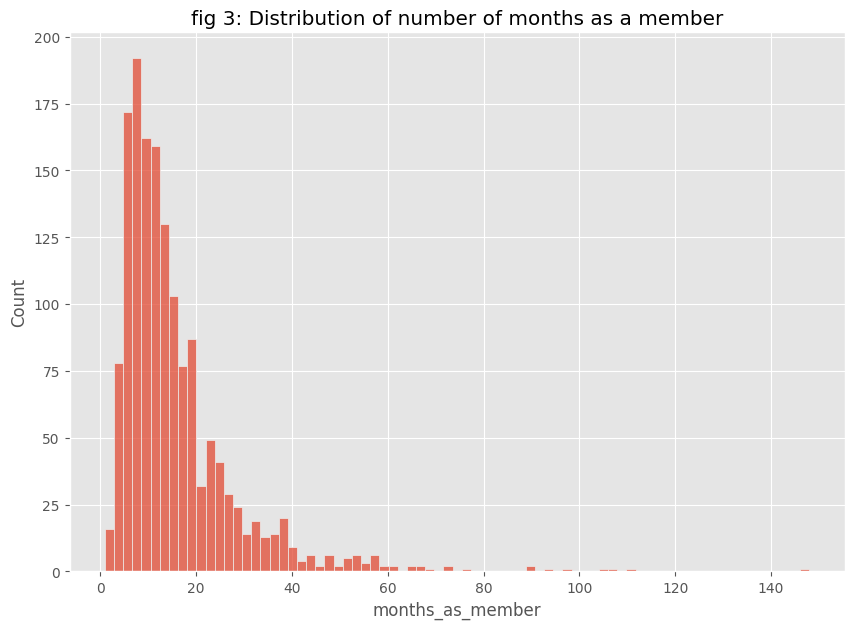

In [81]:
# visualize the distribution of numbe rof months as a member
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(df, x='months_as_member');
ax.set_title('fig 3: Distribution of number of months as a member')

Text(0.5, 1.0, 'fig 4: Distribution of number of months as a member (Log transformation)')

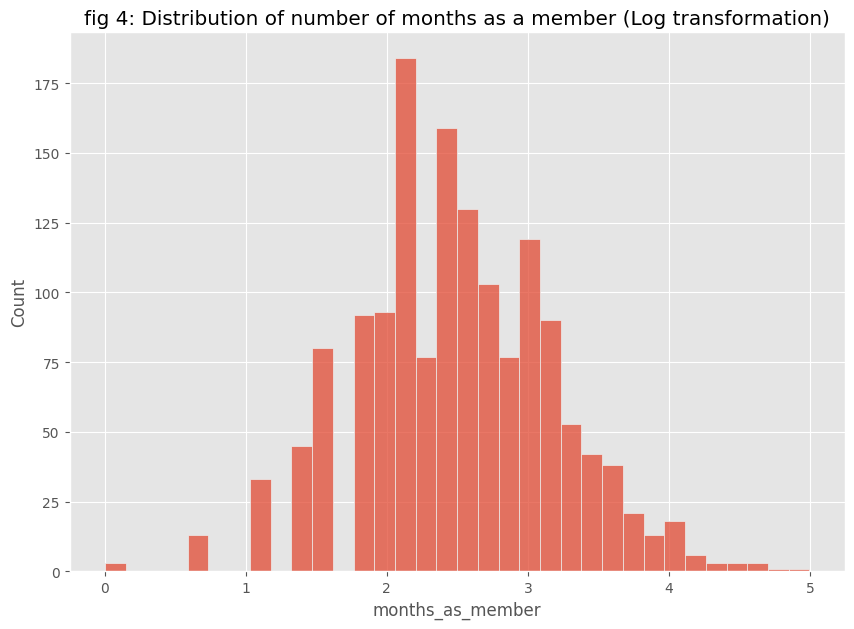

In [82]:
# visualize the distribution of numbe rof months as a member - log transformation
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(x=np.log(df['months_as_member']));
ax.set_title('fig 4: Distribution of number of months as a member (Log transformation)')

## Task 4
### Relationship between attendance and number of months as a member
The mean number of bookings attended is higher among customers who have been members for more 20 months as from the graph, fig 5. <br/>
This means that most bookings attended are those that were booked by customers who have been in business with the gym for longer periods of time.

why:<br/>
Boxplot - Provide a visual representation of the distribution of the data, including the median, interquartile range, and any outliers and easy to understand.

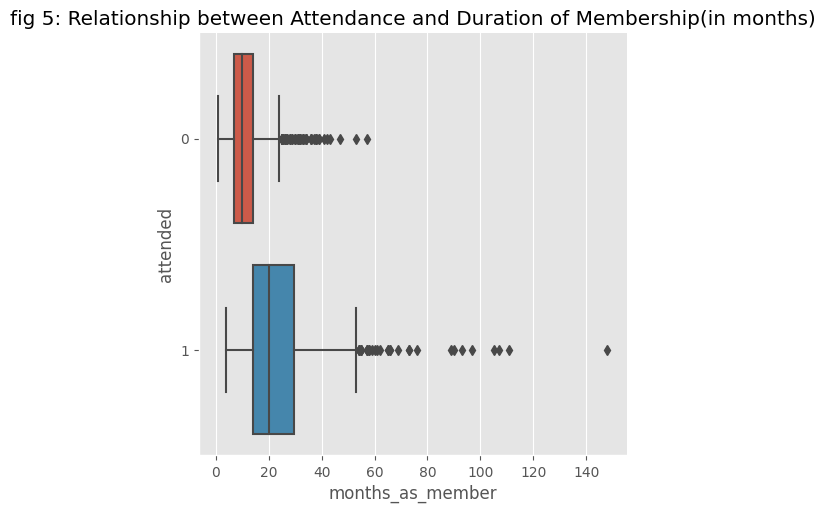

In [83]:
# relationship between attendance and number of months as a member
sns.catplot(df, x='months_as_member', y='attended', kind='box', orient='h').set(title='fig 5: Relationship between Attendance and Duration of Membership(in months)');

## Task 5
### ML problem
This task is a classification task, binary classification in particular.<br/>
This is because we are predicting whether a customer will belong to either of the two target classes, attend or not attend.

#### Data preparation and creating a data transformation pipeline for use in the model pipeline_

In [86]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [85]:
# data preparation
df.drop(['booking_id'], axis=1, inplace=True) # drop booking id - not necessary for the model

#  column_transformer pipeline
ordinal_encoder, onehot_encoder = OrdinalEncoder(), OneHotEncoder()
column_transformer = make_column_transformer(
    (ordinal_encoder, ['day_of_week', 'time']),
    (onehot_encoder, ['category'])
)

# split X and Y
X, y = df.drop(['attended'], axis=1), df['attended']

# make training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(f"trainig: X -> {X_train.shape} y-> {y_train.shape}\ntesting: X -> {X_test.shape} y -> {y_test.shape}")

trainig: X -> (1350, 6) y-> (1350,)
testing: X -> (150, 6) y -> (150,)


## Task 6
### Baseline model: 
Logistic regression model

In [88]:
log_model = LogisticRegression()
log_model_pipeline = make_pipeline(column_transformer, log_model)

log_model_pipeline.fit(X_train, y_train)
log_model_preds = log_model_pipeline.predict(X_test)
print(f"Logistic regression predictions example: {log_model_preds[:5]}")

Logistic regression predictions example: [0 0 0 0 0]


## Task 7
### Comparison model: 
Xgboost classifier

In [89]:
xgb_model = XGBClassifier()
xgb_pipeline = make_pipeline(column_transformer, xgb_model)

xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_test)
print(f"Xgb classifier predictions example: {xgb_preds[:5]}")

Xgb classifier predictions example: [0 0 0 0 0]


## Task 8
### Choice of models
The baseline model chosen is **_Logistic Regression_** because it's simple and efficient to train and it's interpretability.<br/>
The comparison model chosen is **_Xgboost Classifier_** because of it's robustness to overfitting, interpretable and can handle outliers in our data since their extent is not very large.

## Task 9
### Model evaluation
Using _**accuracy score**_ as the metric to compare the models as it is common and easy to explain.<br/>
**_Classification reports_** are also generated to compare the _**recall**_ and _**precision**_ for individual target classes.<br/>
Precision = True Positives / (True Positives + False Positives)<br/>
Recall = True Positives / (True Positives + False Negatives)

In [94]:
from sklearn.metrics import accuracy_score, classification_report


In [95]:
# function to compare the models
def compare_models(m1_preds, m2_preds, y_true, models):
    acc_m1, acc_m2 = accuracy_score(y_true, m1_preds), accuracy_score(y_true, m2_preds)
    print(f"F1 scores: \n {models[0]}: {acc_m1} \t\t {models[1]}: {acc_m2}\n")
    print(f"Classification reports: \n {models[0]}: \n{classification_report(y_true, m1_preds)}\n {models[1]}: \n{classification_report(y_true, m2_preds)}")
    
compare_models(log_model_preds, xgb_preds, y_test, ['Logistic regression', 'Xgboost classifier'])

F1 scores: 
 Logistic regression: 0.68 		 Xgboost classifier: 0.6733333333333333

Classification reports: 
 Logistic regression: 
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       102
           1       0.00      0.00      0.00        48

    accuracy                           0.68       150
   macro avg       0.34      0.50      0.40       150
weighted avg       0.46      0.68      0.55       150

 Xgboost classifier: 
              precision    recall  f1-score   support

           0       0.68      0.99      0.80       102
           1       0.00      0.00      0.00        48

    accuracy                           0.67       150
   macro avg       0.34      0.50      0.40       150
weighted avg       0.46      0.67      0.55       150



## Task 10
### Results
Logistic regression performs better than Xgboost classifier based on accuracy score in this experiment.<br/>
This could be because the data is not very complex and is also quite small allowing logistic regression to do better.<br/>
However, since there is an imbalance in the target class, the models could be heavily biased towards the majority class making their perfomance poor regardless of the accuracy. This opens the possibility of performance improvement after data imbalance is dealt with.

<AxesSubplot: xlabel='attended', ylabel='count'>

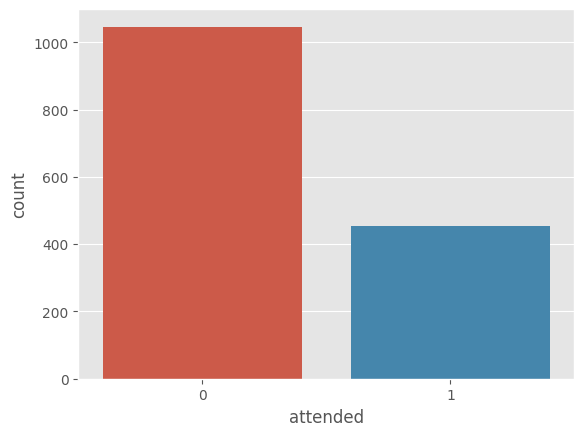

In [97]:
# checking the distribution of target variable
sns.countplot(df, x='attended')

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam